# TODO

In [2]:
import importlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy import units as u
from tqdm.auto import tqdm
import functions_and_classes as fc

# optimistic filters
x_optimistic = np.linspace(3.13, 4.70, 50)

# realistic filters
x_realistic = np.linspace(3.13, 4.70, 15)

# gaia xp filters
'''
https://gea.esac.esa.int/archive/documentation/GDR3/Gaia_archive/chap_datamodel/sec_dm_spectroscopic_tables/ssec_dm_xp_sampled_mean_spectrum.html
'''
x_gaia = np.log10(10*np.linspace(336,1020, 343))

# uocs filters
x_uocs=np.log10([1481,1541,1608, #UVIT
                 2196,2418,2447,2632, #UVIT
                 1548,2303, #GALEX
                 5041,5850,5850, #Gaia
                 3608,4671,6141,7457,8922,#SDSS
                 12350,16620,21590, #2MASS
                 33526,46028,115608,220883 #WISE
                ])

# optical-IR filters
x_optIR=np.log10([5041,5850,5850, #Gaia
                 3608,4671,6141,7457,8922,#SDSS
                 12350,16620,21590, #2MASS
                 33526,46028,115608,220883 #WISE
                ])


## Grids

In [3]:
logT_A_list = np.linspace(3.5,5.1,9)
logL_A_list = np.full(len(logT_A_list),0)
logT_B_list = np.linspace(3.4,5.2,10)
logL_B_list = np.linspace(-4.5,0,10)
σ_list = np.logspace(-4,0,9)[:-2]

logT_B_list = np.linspace(3.4,5.2,10)
logL_B_list = np.linspace(-4.5,0,10)
logT_B_list, logL_B = np.meshgrid(logT_B_list, logL_B_list)
logT_B_list, logL_B_list = logT_B_list.flatten(), logL_B.flatten()

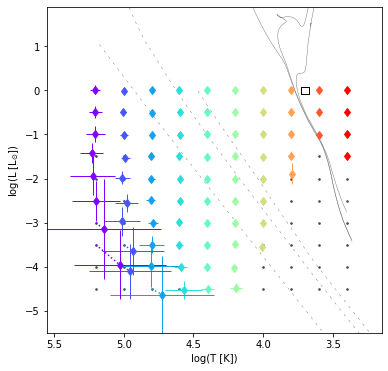

In [4]:
def _plot_isochrone_and_wd(ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    iso = pd.read_csv(fc.DIR_MODELS+'master_isochrone.csv')
    iso_8 = iso[iso.logAge == 8]
    iso_9 = iso[iso.logAge == 9]
    iso_10 = iso[iso.logAge == 10]
    ax.plot((iso_8.logTe), (iso_8.logL), label='',
            c='0.5', lw=0.5, rasterized=True, zorder=-5)
    ax.plot((iso_9.logTe), (iso_9.logL), label='',
            c='0.5', lw=0.5, rasterized=True, zorder=-5)
    ax.plot((iso_10.logTe), (iso_10.logL), label='',
            c='0.5', lw=0.5, rasterized=True, zorder=-5)

    Bergeron_WD = pd.read_csv(fc.DIR_MODELS + 'master_Bergeron_WD.csv')
    WD_02 = Bergeron_WD[(Bergeron_WD.mass == 0.2) &
                        (Bergeron_WD.spectral_type == 'DA')]
    WD_05 = Bergeron_WD[(Bergeron_WD.mass == 0.5) &
                        (Bergeron_WD.spectral_type == 'DA')]
    WD_13 = Bergeron_WD[(Bergeron_WD.mass == 1.3) &
                        (Bergeron_WD.spectral_type == 'DA')]
    ax.plot(np.log10(WD_02.Teff), WD_02.logL, label='', c='0.5',
            ls=(0, (5, 10)), lw=0.5, rasterized=True, zorder=1)
    ax.plot(np.log10(WD_05.Teff), WD_05.logL, label='', c='0.5',
            ls=(0, (5, 10)), lw=0.5, rasterized=True, zorder=1)
    ax.plot(np.log10(WD_13.Teff), WD_13.logL, label='', c='0.5',
            ls=(0, (5, 10)), lw=0.5, rasterized=True, zorder=1)
    
fig, ax = plt.subplots(figsize=(6,6))
for idx, _logT in (enumerate(logT_A_list[:])):
    for jdx, σ in enumerate(σ_list[:]):
        index = jdx+len(σ_list)*idx
        if index==11:
            grid = fc.Grid(T_A = 10**_logT *u.K, 
                        L_A = 1 *u.solLum, 
                        logT_B_list = logT_B_list, 
                        logL_B_list = logL_B_list, 
                        niter=50,
                        σ=σ,
                        name='T%.2f_sigma%.4f_optimistic'%(_logT,σ),
                        x=x_optimistic)
            grid.calculate_params(refit=False)
            grid.plot_skeleton(ax=ax, isochrones=False)
            grid.plot_Double_fitting_points(ax=ax, noisy=False)

ax.set_ylim(-5.5,1.9)
ax.set_xlim(5.55,3.15)
ax.set_ylabel('log(L [L$_⊙$])')
ax.set_xlabel('log(T [K])')
_plot_isochrone_and_wd(ax)
plt.savefig('plots/public/demo_hrd_grid.jpg', dpi=300, bbox_inches='tight')
plt.savefig('plots/public/demo_hrd_grid.pdf', dpi=300, bbox_inches='tight')

9it [00:14,  1.62s/it]


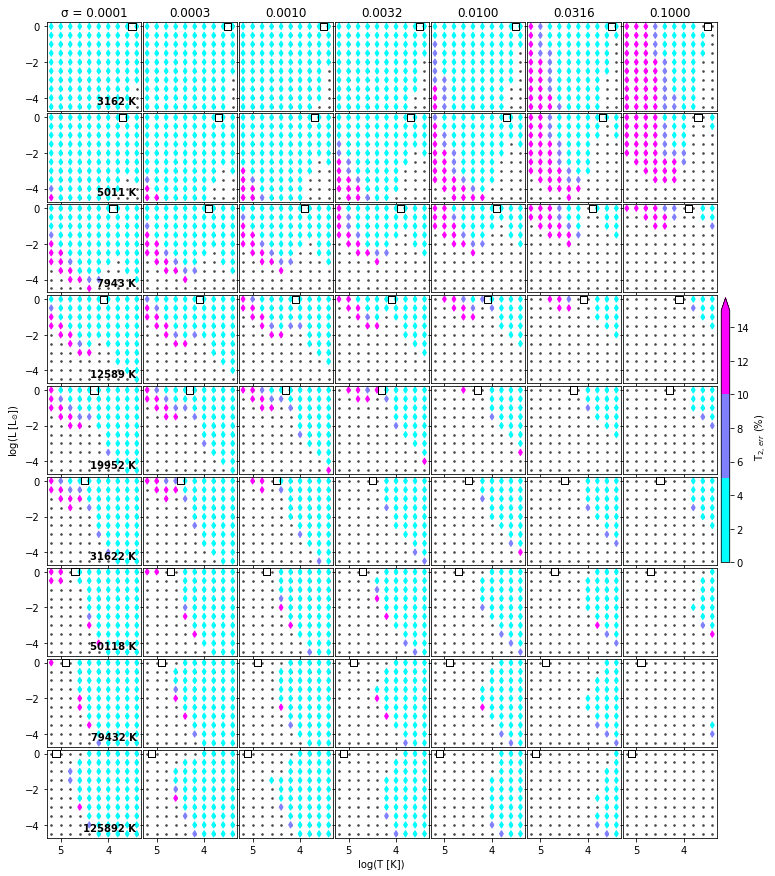

In [41]:
importlib.reload(fc)
import warnings
warnings.filterwarnings("ignore")

logT_A_list = np.linspace(3.5,5.1,9)[:]
σ_list = np.logspace(-4,-1,7)[:]

ncols=len(σ_list)
nrows=len(logT_A_list)

fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,15), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.02,hspace=0.03)
cax = ax[4,6].inset_axes([1.05, -1, 0.09, 3])


for idx, _logT in fc.tqdm(enumerate(logT_A_list[:])):
    for jdx, σ in enumerate(σ_list[:]):
        # if (idx<3) & (jdx<3):
        index = jdx+len(σ_list)*idx
        grid = fc.Grid(T_A = 10**_logT *u.K, 
                    L_A = 1 *u.solLum, 
                    logT_B_list = logT_B_list, 
                    logL_B_list = logL_B_list, 
                    niter=50,
                    σ=σ,
                    name='T%.2f_sigma%.4f_optimistic'%(_logT,σ),
                    x=x_optimistic)
        grid.calculate_params(refit=False)
        grid.plot_skeleton(ax[idx, jdx], isochrones=False)
        colorbar = False
        if idx==0:
            if jdx==0:
                ax[idx, jdx].set_title('σ = %.4f'%σ)
                colorbar=True
            else:
                ax[idx, jdx].set_title('%.4f'%σ)
        if jdx==0:
            ax[idx,jdx].text(0.95, 0.05, '%d K'%10**_logT, fontsize=10, 
                            transform=ax[idx,jdx].transAxes, ha='right',va='bottom', weight='bold')
        grid.plot_Double_fitting_std(ax[idx, jdx], s=20, cax=cax, zorder=-1, colorbar=colorbar)
                
ax[0,0].invert_xaxis()
ax[4,0].set_ylabel('log(L [L$_⊙$])')
ax[8,3].set_xlabel('log(T [K])')

plt.savefig('plots/public/hrd_optimistic.jpg', dpi=300, bbox_inches='tight')
plt.savefig('plots/public/hrd_optimistic.pdf', dpi=300, bbox_inches='tight')

9it [00:13,  1.49s/it]


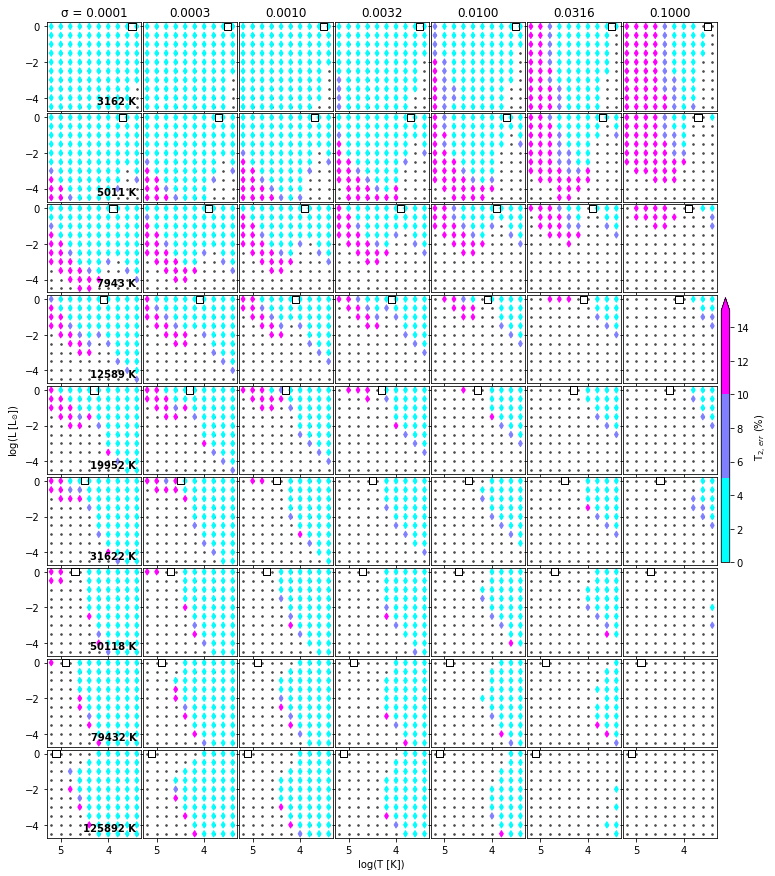

In [42]:
importlib.reload(fc)
import warnings
warnings.filterwarnings("ignore")

logT_A_list = np.linspace(3.5,5.1,9)[:]
σ_list = np.logspace(-4,-1,7)[:]

ncols=len(σ_list)
nrows=len(logT_A_list)

fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,15), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.02,hspace=0.03)
cax = ax[4,6].inset_axes([1.05, -1, 0.09, 3])


for idx, _logT in fc.tqdm(enumerate(logT_A_list[:])):
    for jdx, σ in enumerate(σ_list[:]):
        grid = fc.Grid(T_A = 10**_logT *u.K, 
                    L_A = 1 *u.solLum, 
                    logT_B_list = logT_B_list, 
                    logL_B_list = logL_B_list, 
                    niter=50,
                    σ=σ,
                    name='T%.2f_sigma%.4f_realistic'%(_logT,σ),
                    x=x_realistic)
        grid.calculate_params(refit=False)
        grid.plot_skeleton(ax[idx, jdx], isochrones=False)
        colorbar = False
        if idx==0:
            if jdx==0:
                ax[idx, jdx].set_title('σ = %.4f'%σ)
                colorbar=True
            else:
                ax[idx, jdx].set_title('%.4f'%σ)
        if jdx==0:
            ax[idx,jdx].text(0.95, 0.05, '%d K'%10**_logT, fontsize=10, 
                            transform=ax[idx,jdx].transAxes, ha='right',va='bottom', weight='bold')
        grid.plot_Double_fitting_std(ax[idx, jdx], s=20, cax=cax, zorder=-1, colorbar=colorbar)
                
ax[0,0].invert_xaxis()
ax[4,0].set_ylabel('log(L [L$_⊙$])')
ax[8,3].set_xlabel('log(T [K])')

plt.savefig('plots/public/hrd_realistic.jpg', dpi=300, bbox_inches='tight')
plt.savefig('plots/public/hrd_realistic.pdf', dpi=300, bbox_inches='tight')

9it [00:29,  3.26s/it]


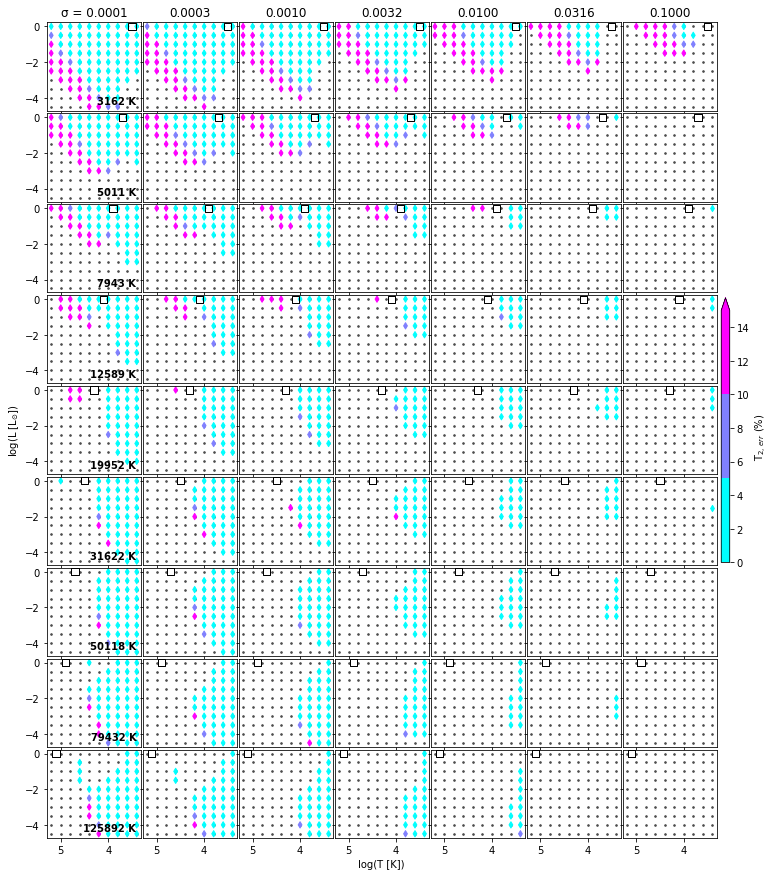

In [45]:
importlib.reload(fc)
import warnings
warnings.filterwarnings("ignore")

logT_A_list = np.linspace(3.5,5.1,9)[:]
σ_list = np.logspace(-4,-1,7)[:]

ncols=len(σ_list)
nrows=len(logT_A_list)

fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,15), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.02,hspace=0.03)
cax = ax[4,6].inset_axes([1.05, -1, 0.09, 3])


for idx, _logT in fc.tqdm(enumerate(logT_A_list[:])):
    for jdx, σ in enumerate(σ_list[:]):
        grid = fc.Grid(T_A = 10**_logT *u.K, 
                    L_A = 1 *u.solLum, 
                    logT_B_list = logT_B_list, 
                    logL_B_list = logL_B_list, 
                    niter=50,
                    σ=σ,
                    name='T%.2f_sigma%.4f_gaia'%(_logT,σ),
                    x=x_gaia)
        grid.calculate_params(refit=False)
        grid.plot_skeleton(ax[idx, jdx], isochrones=False)
        colorbar = False
        if idx==0:
            if jdx==0:
                ax[idx, jdx].set_title('σ = %.4f'%σ)
                colorbar=True
            else:
                ax[idx, jdx].set_title('%.4f'%σ)
        if jdx==0:
            ax[idx,jdx].text(0.95, 0.05, '%d K'%10**_logT, fontsize=10, 
                            transform=ax[idx,jdx].transAxes, ha='right',va='bottom', weight='bold')
        grid.plot_Double_fitting_std(ax[idx, jdx], s=20, cax=cax, zorder=-1, colorbar=colorbar)
                
ax[0,0].invert_xaxis()
ax[4,0].set_ylabel('log(L [L$_⊙$])')
ax[8,3].set_xlabel('log(T [K])')

plt.savefig('plots/public/hrd_gaia.jpg', dpi=300, bbox_inches='tight')
plt.savefig('plots/public/hrd_gaia.pdf', dpi=300, bbox_inches='tight')

9it [00:13,  1.46s/it]


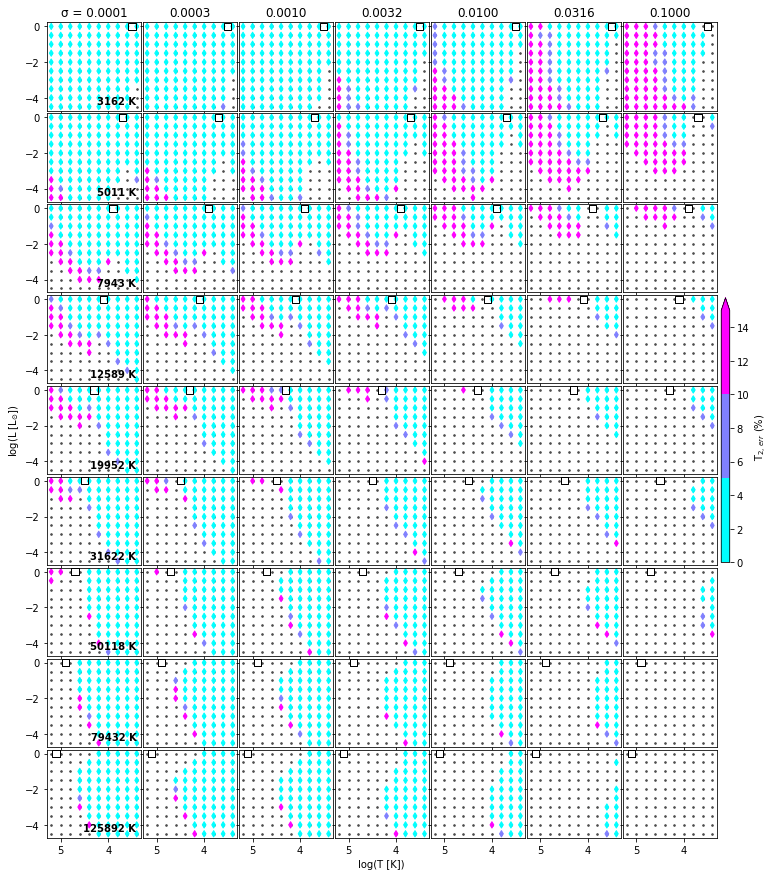

In [43]:
importlib.reload(fc)
import warnings
warnings.filterwarnings("ignore")

logT_A_list = np.linspace(3.5,5.1,9)[:]
σ_list = np.logspace(-4,-1,7)[:]

ncols=len(σ_list)
nrows=len(logT_A_list)

fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,15), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.02,hspace=0.03)
cax = ax[4,6].inset_axes([1.05, -1, 0.09, 3])


for idx, _logT in fc.tqdm(enumerate(logT_A_list[:])):
    for jdx, σ in enumerate(σ_list[:]):
        grid = fc.Grid(T_A = 10**_logT *u.K, 
                    L_A = 1 *u.solLum, 
                    logT_B_list = logT_B_list, 
                    logL_B_list = logL_B_list, 
                    niter=50,
                    σ=σ,
                    name='T%.2f_sigma%.4f_uocs'%(_logT,σ),
                    x=x_uocs)
        grid.calculate_params(refit=False)
        grid.plot_skeleton(ax[idx, jdx], isochrones=False)
        colorbar = False
        if idx==0:
            if jdx==0:
                ax[idx, jdx].set_title('σ = %.4f'%σ)
                colorbar=True
            else:
                ax[idx, jdx].set_title('%.4f'%σ)
        if jdx==0:
            ax[idx,jdx].text(0.95, 0.05, '%d K'%10**_logT, fontsize=10, 
                            transform=ax[idx,jdx].transAxes, ha='right',va='bottom', weight='bold')
        grid.plot_Double_fitting_std(ax[idx, jdx], s=20, cax=cax, zorder=-1, colorbar=colorbar)
                
ax[0,0].invert_xaxis()
ax[4,0].set_ylabel('log(L [L$_⊙$])')
ax[8,3].set_xlabel('log(T [K])')

plt.savefig('plots/public/hrd_uocs.jpg', dpi=300, bbox_inches='tight')
plt.savefig('plots/public/hrd_uocs.pdf', dpi=300, bbox_inches='tight')

9it [00:10,  1.22s/it]


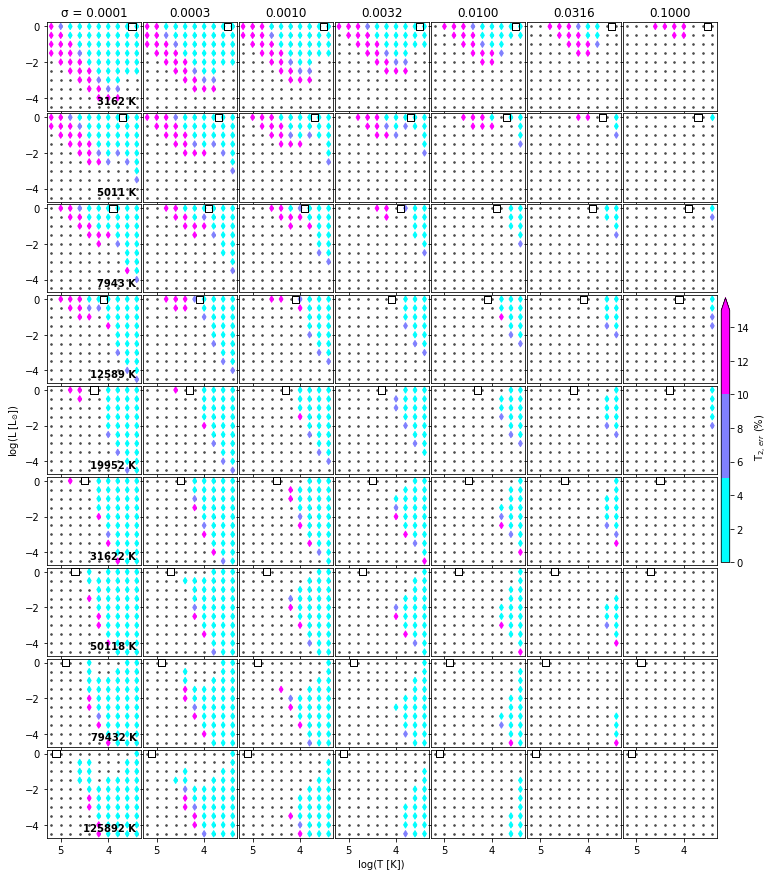

In [5]:
importlib.reload(fc)
import warnings
warnings.filterwarnings("ignore")

logT_A_list = np.linspace(3.5,5.1,9)[:]
σ_list = np.logspace(-4,-1,7)[:]

ncols=len(σ_list)
nrows=len(logT_A_list)

fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,15), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.02,hspace=0.03)
cax = ax[4,6].inset_axes([1.05, -1, 0.09, 3])


for idx, _logT in fc.tqdm(enumerate(logT_A_list[:])):
    for jdx, σ in enumerate(σ_list[:]):
        grid = fc.Grid(T_A = 10**_logT *u.K, 
                    L_A = 1 *u.solLum, 
                    logT_B_list = logT_B_list, 
                    logL_B_list = logL_B_list, 
                    niter=50,
                    σ=σ,
                    name='T%.2f_sigma%.4f_optIR'%(_logT,σ),
                    x=x_optIR)
        grid.calculate_params(refit=False)
        grid.plot_skeleton(ax[idx, jdx], isochrones=False)
        colorbar = False
        if idx==0:
            if jdx==0:
                ax[idx, jdx].set_title('σ = %.4f'%σ)
                colorbar=True
            else:
                ax[idx, jdx].set_title('%.4f'%σ)
        if jdx==0:
            ax[idx,jdx].text(0.95, 0.05, '%d K'%10**_logT, fontsize=10, 
                            transform=ax[idx,jdx].transAxes, ha='right',va='bottom', weight='bold')
        grid.plot_Double_fitting_std(ax[idx, jdx], s=20, cax=cax, zorder=-1, colorbar=colorbar)
                
ax[0,0].invert_xaxis()
ax[4,0].set_ylabel('log(L [L$_⊙$])')
ax[8,3].set_xlabel('log(T [K])')

plt.savefig('plots/public/hrd_optIR.jpg', dpi=300, bbox_inches='tight')
plt.savefig('plots/public/hrd_optIR.pdf', dpi=300, bbox_inches='tight')

## Unresolved

In [6]:
zams = pd.read_csv(fc.DIR_MODELS+'master_ZAMS.csv')
zams = zams[zams.MH==0].sort_values(by='Mass')

mass_list = [0.9,1.0,1.2,1.5,2.0,2.5,3.0,4.0,5.0,6.0,8.0,10.0]
logT_A_list = np.interp(np.log10(mass_list), np.log10(zams.Mass), zams.logTe)
logL_A_list = np.interp(np.log10(mass_list), np.log10(zams.Mass), zams.logL)
σ_list = np.logspace(-4,-1,7)[:-1]
print(mass_list, '\n',logT_A_list, '\n',logL_A_list)
print(σ_list)


def _plot_isochrone_and_wd(ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    iso = pd.read_csv(fc.DIR_MODELS+'master_isochrone.csv')
    iso_8 = iso[iso.logAge == 8]
    iso_9 = iso[iso.logAge == 9]
    iso_10 = iso[iso.logAge == 10]
    ax.plot((iso_8.logTe), (iso_8.logL), label='',
            c='0.5', lw=0.5, rasterized=True, zorder=-5)
    ax.plot((iso_9.logTe), (iso_9.logL), label='',
            c='0.5', lw=0.5, rasterized=True, zorder=-5)
    ax.plot((iso_10.logTe), (iso_10.logL), label='',
            c='0.5', lw=0.5, rasterized=True, zorder=-5)

[0.9, 1.0, 1.2, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0, 6.0, 8.0, 10.0] 
 [3.73130222 3.75960804 3.8041     3.8655     3.9765     4.04995976
 4.1042     4.18303567 4.24364719 4.2912     4.35817123 4.40974122] 
 [-0.3318039  -0.11695627  0.267       0.718       1.24        1.62019299
  1.926       2.39660155  2.74830951  3.025       3.45681497  3.76927827]
[0.0001     0.00031623 0.001      0.00316228 0.01       0.03162278]


M3.00_sigma0.0003_gaia


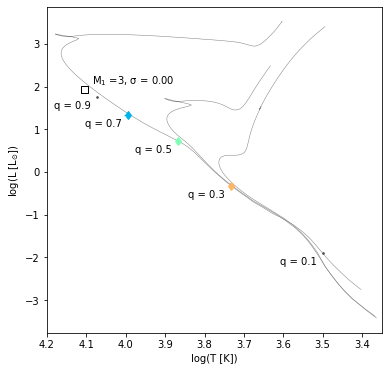

In [6]:
importlib.reload(fc)
fig, ax = plt.subplots(figsize=(6,6))
for idx, mass in enumerate(mass_list):
    T_A = 10**logT_A_list[idx]
    L_A = 10**logL_A_list[idx]
    q_list = np.array([0.1,0.3,0.5,0.7,0.9])
    secondary_mass_list = mass_list[idx] * q_list
    logT_B_list = np.interp(np.log10(secondary_mass_list), np.log10(zams.Mass), zams.logTe)
    logL_B_list = np.interp(np.log10(secondary_mass_list), np.log10(zams.Mass), zams.logL)
    
    for jdx, σ in enumerate(σ_list[:]):
        
        index = jdx+len(σ_list)*idx
        if index==37:
            grid = fc.Grid(T_A = T_A*u.K, 
                    L_A = L_A*u.solLum, 
                    niter=50,
                    σ=σ,
                    name='M%.2f_sigma%.4f_gaia'%(mass, σ),
                    logT_B_list=logT_B_list,
                    logL_B_list=logL_B_list,
                    x=x_gaia)
            print(grid.name)
        
            grid.calculate_params(refit=False)
            grid.plot_skeleton(ax=ax, isochrones=False)
            grid.plot_Double_fitting_points(ax=ax, noisy=False)
            _plot_isochrone_and_wd(ax=ax)
            for kdx, q in enumerate(q_list):
                ax.text(logT_B_list[kdx]+0.11,logL_B_list[kdx]-0.19,'q = %.1f'%q, va='center')
            ax.text(np.log10(T_A)-0.01, np.log10(L_A)+0.15,' M$_1$ =%d, σ = %.2f'%(mass,σ))
# ax.set_ylim(-3,0.8)
ax.set_xlim(4.2,3.35)

ax.set_ylabel('log(L [L$_⊙$])')
ax.set_xlabel('log(T [K])')
plt.savefig('plots/public/demo_hrd_unresolved.jpg', dpi=300, bbox_inches='tight')
plt.savefig('plots/public/demo_hrd_unresolved.pdf', dpi=300, bbox_inches='tight')

12it [00:11,  1.03it/s]


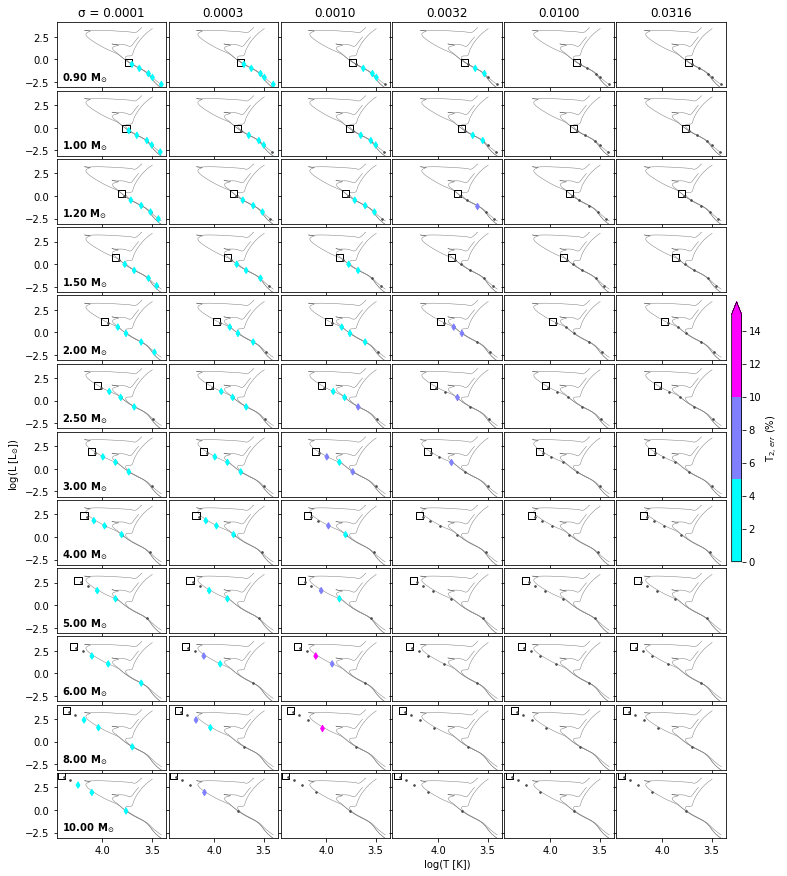

In [7]:
importlib.reload(fc)
import warnings
warnings.filterwarnings("ignore")

ncols=len(σ_list)
nrows=len(mass_list)

fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,15), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.02,hspace=0.05)
cax = ax[6,ncols-1].inset_axes([1.05, -1, 0.09, 4])

for idx, mass in tqdm(enumerate(mass_list)):
    T_A = 10**logT_A_list[idx]
    L_A = 10**logL_A_list[idx]

    secondary_mass_list = mass_list[idx] * np.array([0.1,0.3,0.5,0.7,0.9])
    logT_B_list = np.interp(np.log10(secondary_mass_list), np.log10(zams.Mass), zams.logTe)
    logL_B_list = np.interp(np.log10(secondary_mass_list), np.log10(zams.Mass), zams.logL)
    
    for jdx, σ in enumerate(σ_list[:]):
        index = jdx+len(σ_list)*idx
        grid = fc.Grid(T_A = T_A*u.K, 
                    L_A = L_A*u.solLum, 
                    niter=50,
                    σ=σ,
                    name='M%.2f_sigma%.4f_gaia'%(mass, σ),
                    logT_B_list=logT_B_list,
                    logL_B_list=logL_B_list,
                    x=x_gaia)
        grid.calculate_params(refit=False)
        grid.plot_skeleton(ax[idx, jdx], isochrones=False, zorder=-2)
        colorbar = False
        if idx==0:
            if jdx==0:
                ax[idx, jdx].set_title('σ = %.4f'%σ)
                colorbar=True
            else:
                ax[idx, jdx].set_title('%.4f'%σ)
        if jdx==0:
            ax[idx,jdx].text(0.05, 0.05, '%.2f M$_⊙$'%mass, fontsize=10, 
                            transform=ax[idx,jdx].transAxes, ha='left',va='bottom', weight='bold')
        grid.plot_Double_fitting_std(ax[idx, jdx], s=20, cax=cax, zorder=-1, colorbar=colorbar)
        
ax[0,0].invert_xaxis()
ax[0,0].set_xlim(ax[0,0].get_xlim())
ax[0,0].set_ylim(ax[0,0].get_ylim())
ax[6,0].set_ylabel('log(L [L$_⊙$])')
ax[nrows-1,3].set_xlabel('log(T [K])')

for idx in range(nrows):
    for jdx in range(ncols):
         _plot_isochrone_and_wd(ax=ax[idx,jdx])

plt.savefig('plots/public/hrd_unresolved_gaia.jpg', dpi=300, bbox_inches='tight')
plt.savefig('plots/public/hrd_unresolved_gaia.pdf', dpi=300, bbox_inches='tight')

In [8]:
a = 'run_2/plots/public/demo_hrd_unresolved.pdf'
import os
os.path.dirname(a)

'run_2/plots/public'

## Hotter companions

In [2]:
zams = pd.read_csv(fc.DIR_MODELS+'master_ZAMS.csv')
zams = zams[zams.MH==0].sort_values(by='Mass')

mass_list = [0.8,1.0,1.2,1.4,1.6,1.8,2.0,2.5,3.0]
logT_A_list = np.interp(np.log10(mass_list), np.log10(zams.Mass), zams.logTe)
logL_A_list = np.interp(np.log10(mass_list), np.log10(zams.Mass), zams.logL)
print(mass_list, '\n', logT_A_list, '\n', logL_A_list)

σ_list = np.logspace(-3,-1,5)[:]
print(σ_list)

logT_B_list = np.linspace(4.7,3.95,10)
logL_B_list = np.linspace(-3,1.5,11)
logT_B_list, logL_B_list = np.meshgrid(logT_B_list, logL_B_list)
i = np.indices(logT_B_list.shape)
_filter = (i[0]+i[1]<17)
_filter = _filter.flatten()
logT_B_list = logT_B_list.flatten()[_filter.flatten()]
logL_B_list = logL_B_list.flatten()[_filter.flatten()]

def _plot_isochrone_and_wd(ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    iso = pd.read_csv(fc.DIR_MODELS+'master_isochrone.csv')
    iso_8 = iso[iso.logAge == 8]
    iso_9 = iso[iso.logAge == 9]
    iso_10 = iso[iso.logAge == 10]
    ax.plot((iso_8.logTe), (iso_8.logL), label='',
            c='0.5', lw=0.5, rasterized=True, zorder=-5)
    ax.plot((iso_9.logTe), (iso_9.logL), label='',
            c='0.5', lw=0.5, rasterized=True, zorder=-5)
    ax.plot((iso_10.logTe), (iso_10.logL), label='',
            c='0.5', lw=0.5, rasterized=True, zorder=-5)

    Bergeron_WD = pd.read_csv(fc.DIR_MODELS + 'master_Bergeron_WD.csv')
    WD_02 = Bergeron_WD[(Bergeron_WD.mass == 0.2) &
                        (Bergeron_WD.spectral_type == 'DA')]
    WD_05 = Bergeron_WD[(Bergeron_WD.mass == 0.5) &
                        (Bergeron_WD.spectral_type == 'DA')]
    WD_13 = Bergeron_WD[(Bergeron_WD.mass == 1.3) &
                        (Bergeron_WD.spectral_type == 'DA')]
    ax.plot(np.log10(WD_02.Teff), WD_02.logL, label='', c='0.5',
            ls=(0, (5, 10)), lw=0.5, rasterized=True, zorder=1)
    ax.plot(np.log10(WD_05.Teff), WD_05.logL, label='', c='0.5',
            ls=(0, (5, 10)), lw=0.5, rasterized=True, zorder=1)
    ax.plot(np.log10(WD_13.Teff), WD_13.logL, label='', c='0.5',
            ls=(0, (5, 10)), lw=0.5, rasterized=True, zorder=1)
    

[0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.5, 3.0] 
 [3.6961     3.75960804 3.8041     3.8421     3.8922     3.93910271
 3.9765     4.04995976 4.1042    ] 
 [-0.569      -0.11695627  0.267       0.583       0.842       1.05397301
  1.24        1.62019299  1.926     ]
[0.001      0.00316228 0.01       0.03162278 0.1       ]


M1.00_sigma0.0100_uocs
M1.00_sigma0.0100_optIR


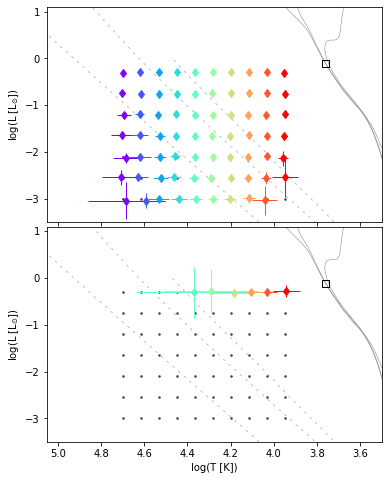

In [7]:
fig, ax = plt.subplots(figsize=(6,8), nrows=2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.02)

plot_index=7
for idx, mass in enumerate(mass_list[:]):
    T_A = 10**logT_A_list[idx]
    L_A = 10**logL_A_list[idx]   
    _filter =  (logL_B_list <=logL_A_list[idx])
    for jdx, σ in enumerate(σ_list[:]):
        index = jdx+len(σ_list)*idx
        if index == plot_index:
            grid = fc.Grid(T_A = T_A*u.K, 
                L_A = L_A*u.solLum, 
                niter=50,
                σ=σ,
                name='M%.2f_sigma%.4f_uocs'%(mass,σ),
                logT_B_list=logT_B_list[_filter],
                logL_B_list=logL_B_list[_filter],
                x=x_uocs)
            grid.calculate_params(refit=False)
            grid.plot_skeleton(ax=ax[0], isochrones=False)
            grid.plot_Double_fitting_points(ax=ax[0], noisy=False)
            print(grid.name)

for idx, mass in enumerate(mass_list[:]):
    T_A = 10**logT_A_list[idx]
    L_A = 10**logL_A_list[idx]   
    _filter =  (logL_B_list <=logL_A_list[idx])
    for jdx, σ in enumerate(σ_list[:]):
        index = jdx+len(σ_list)*idx
        if index == plot_index:
            grid = fc.Grid(T_A = T_A*u.K, 
                L_A = L_A*u.solLum, 
                niter=50,
                σ=σ,
                name='M%.2f_sigma%.4f_optIR'%(mass,σ),
                logT_B_list=logT_B_list[_filter],
                logL_B_list=logL_B_list[_filter],
                x=x_optIR)
            grid.calculate_params(refit=False)
            grid.plot_skeleton(ax=ax[1], isochrones=False)
            grid.plot_Double_fitting_points(ax=ax[1], noisy=False)
            print(grid.name)
ax[0].set_ylim(-3.5,1.1)
ax[0].set_xlim(5.05,3.5)

ax[0].set_ylabel('log(L [L$_⊙$])')
ax[1].set_ylabel('log(L [L$_⊙$])')
ax[1].set_xlabel('log(T [K])')
_plot_isochrone_and_wd(ax[0])
_plot_isochrone_and_wd(ax[1])
plt.savefig('plots/public/demo_hrd_hotter_companions.jpg', dpi=300, bbox_inches='tight')
plt.savefig('plots/public/demo_hrd_hotter_companions.pdf', dpi=300, bbox_inches='tight')

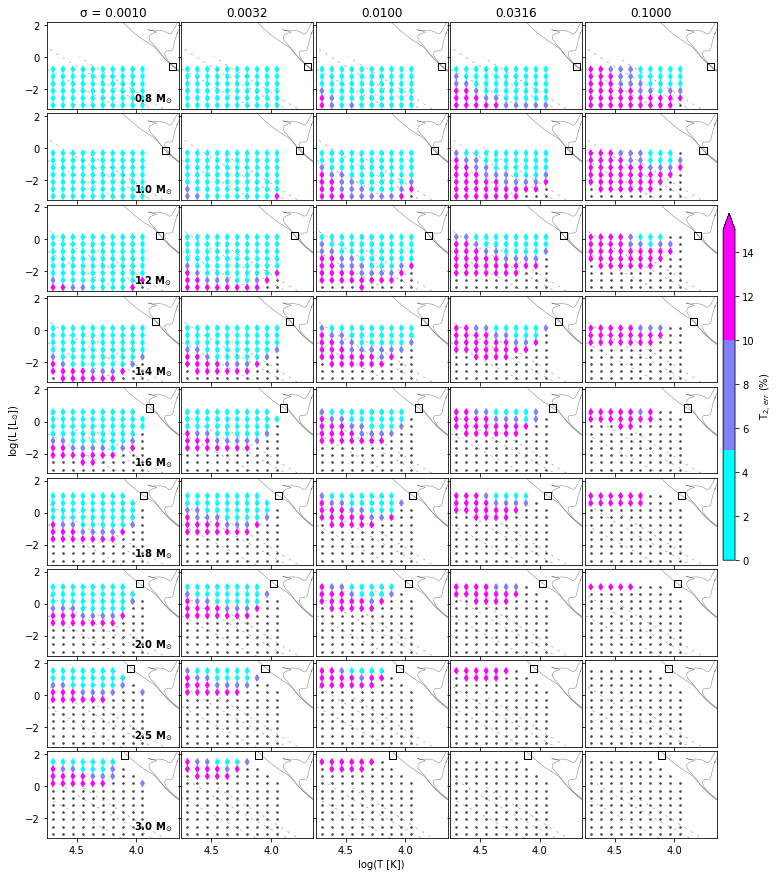

In [5]:
importlib.reload(fc)
import warnings
warnings.filterwarnings("ignore")

ncols=len(σ_list)
nrows=len(mass_list)

fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,15), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.02,hspace=0.05)
cax = ax[4,ncols-1].inset_axes([1.05, -1, 0.09, 4])

for idx, mass in enumerate(mass_list[:]):
    T_A = 10**logT_A_list[idx]
    L_A = 10**logL_A_list[idx]   
    _filter =  (logL_B_list <=logL_A_list[idx])
    for jdx, σ in enumerate(σ_list[:]):
        index = jdx+len(σ_list)*idx
        grid = fc.Grid(T_A = T_A*u.K, 
            L_A = L_A*u.solLum, 
            niter=50,
            σ=σ,
            name='M%.2f_sigma%.4f_uocs'%(mass,σ),
            logT_B_list=logT_B_list[_filter],
            logL_B_list=logL_B_list[_filter],
            x=x_uocs)
        grid.calculate_params(refit=False)
        grid.plot_skeleton(ax[idx, jdx], isochrones=False, zorder=-2)
        colorbar = False
        if idx==0:
            if jdx==0:
                ax[idx, jdx].set_title('σ = %.4f'%σ)
                colorbar=True
            else:
                ax[idx, jdx].set_title('%.4f'%σ)
        if jdx==0:
            ax[idx,jdx].text(0.95, 0.05, '%.1f M$_⊙$'%mass, fontsize=10, 
                            transform=ax[idx,jdx].transAxes, ha='right',va='bottom', weight='bold')
        grid.plot_Double_fitting_std(ax[idx, jdx], s=20, cax=cax, zorder=-1, colorbar=colorbar)
            
ax[0,0].invert_xaxis()
ax[0,0].set_xlim(ax[0,0].get_xlim())
ax[0,0].set_ylim(ax[0,0].get_ylim())
ax[4,0].set_ylabel('log(L [L$_⊙$])')
ax[nrows-1,2].set_xlabel('log(T [K])')

for idx in range(nrows):
    for jdx in range(ncols):
         _plot_isochrone_and_wd(ax=ax[idx,jdx])

plt.savefig('plots/public/hrd_hotter_companions_uocs.jpg', dpi=300, bbox_inches='tight')
plt.savefig('plots/public/hrd_hotter_companions_uocs.pdf', dpi=300, bbox_inches='tight')

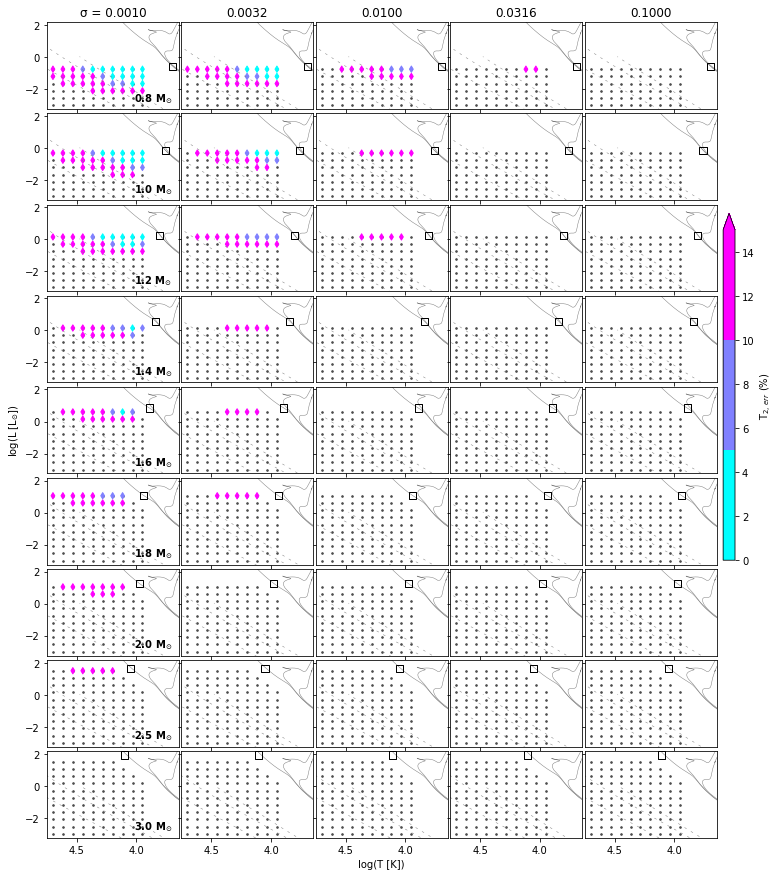

In [9]:
importlib.reload(fc)
import warnings
warnings.filterwarnings("ignore")

ncols=len(σ_list)
nrows=len(mass_list)

fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(12,15), sharex=True, sharey=True)
fig.subplots_adjust(wspace=0.02,hspace=0.05)
cax = ax[4,ncols-1].inset_axes([1.05, -1, 0.09, 4])

for idx, mass in enumerate(mass_list[:]):
    T_A = 10**logT_A_list[idx]
    L_A = 10**logL_A_list[idx]   
    _filter =  (logL_B_list <=logL_A_list[idx])
    for jdx, σ in enumerate(σ_list[:]):
        index = jdx+len(σ_list)*idx
        grid = fc.Grid(T_A = T_A*u.K, 
                    L_A = L_A*u.solLum, 
                    niter=50,
                    σ=σ,
                    name='M%.2f_sigma%.4f_optIR'%(mass,σ),
                    logT_B_list=logT_B_list[_filter],
                    logL_B_list=logL_B_list[_filter],
                    x=x_optIR)
        grid.calculate_params(refit=False)
        grid.plot_skeleton(ax[idx, jdx], isochrones=False, zorder=-2)
        colorbar = False
        if idx==0:
            if jdx==0:
                ax[idx, jdx].set_title('σ = %.4f'%σ)
                colorbar=True
            else:
                ax[idx, jdx].set_title('%.4f'%σ)
        if jdx==0:
            ax[idx,jdx].text(0.95, 0.05, '%.1f M$_⊙$'%mass, fontsize=10, 
                            transform=ax[idx,jdx].transAxes, ha='right',va='bottom', weight='bold')
        grid.plot_Double_fitting_std(ax[idx, jdx], s=20, cax=cax, zorder=-1, colorbar=colorbar)
            
ax[0,0].invert_xaxis()
ax[0,0].set_xlim(ax[0,0].get_xlim())
ax[0,0].set_ylim(ax[0,0].get_ylim())
ax[4,0].set_ylabel('log(L [L$_⊙$])')
ax[nrows-1,2].set_xlabel('log(T [K])')

for idx in range(nrows):
    for jdx in range(ncols):
         _plot_isochrone_and_wd(ax=ax[idx,jdx])

plt.savefig('plots/public/hrd_hotter_companions_optIR.jpg', dpi=300, bbox_inches='tight')
plt.savefig('plots/public/hrd_hotter_companions_optIR.pdf', dpi=300, bbox_inches='tight')

In [ ]:
len(x_optIR)